In [73]:
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import random
import time
import sympy as sp
import matplotlib.pyplot as plt
import timeit

Q.1

Q.2

In [2]:
n = 3
k = 4
m = 2
# lists of lists
def generate_mat(x,y):
    mat = []
    for i in range(x):
        mat.append(random.sample(range(1,10),y))
    return mat
    
matA = generate_mat(n,k)
matB = generate_mat(k,m)
print(matA)
print(matB)

[[3, 6, 5, 9], [6, 8, 4, 1], [4, 3, 2, 6]]
[[8, 7], [2, 1], [6, 7], [6, 3]]


In [3]:
def multiply(matA, matB):
    n_row = len(matA) # n
    n_col = len(matA[0]) # k
    n2_row = len(matB) # k
    n2_col = len(matB[0]) # m
    
    if(n_col != n2_row):
        return -1
    
    res_mat = [[0 for i in range(n2_col)] for j in range(n_row)]
    
    for i in range(n_row):
        for j in range(n2_col):
            for k in range(n_col):
                res_mat[i][j] += matA[i][k] * matB[k][j]

    return res_mat         

# matrix multiplication in python
start_time = time.time()
res_mat = multiply(matA, matB)
end_time = time.time()
print(res_mat)
time_python = end_time - start_time
print(time_python)

[[120, 89], [94, 81], [86, 63]]
3.5762786865234375e-05


In [4]:
# numpy array
import numpy as np

mat_A = np.random.randint(10, size=(n, k))
mat_B = np.random.randint(10, size=(k, m))
print(mat_A)
print(mat_B)

# matrix multiplication
start_time = time.time()
res_Mat = np.dot(mat_A, mat_B)
end_time = time.time()
print(res_Mat)
time_numpy = end_time - start_time
print(time_numpy)

[[5 1 4 7]
 [4 7 6 9]
 [3 3 1 5]]
[[1 9]
 [7 2]
 [3 7]
 [9 8]]
[[ 87 131]
 [152 164]
 [ 72  80]]
3.528594970703125e-05


In [5]:
# difference in the time
time_numpy - time_python

-4.76837158203125e-07

Q.3

Time complexity of finding median as given: O(n)

In [75]:
def median_sorted(arr,n):
    sorted(arr)
    if n%2 != 0:
        return float(arr[int (n/2)])
    
    return float(( arr[int((n-1)/2)] + arr[int((n/2))]) /2 )

def median_unsorted(arr,n):
    temp = arr.copy()
    highest = max(temp)
    temp.remove(highest)
    sec_highest = max(temp)
    return (highest+sec_highest) / 2

arr= random.sample(range(1,10000),500)
n=500
np_arr= np.random.randint(10000,size=500)

sorted_method_time = timeit.timeit(lambda:median_sorted(arr,n),number=500)
unsorted_method_time = timeit.timeit(lambda:median_unsorted(arr,n),number=500)
numpy_time = timeit.timeit(lambda:np.median(arr,axis=0),number=500)
print(sorted_method_time)
print(unsorted_method_time)
print(numpy_time)    

0.008059100000537
0.005373101001168834
0.01558246399872587


Q.4

Q.5

In [6]:
# Random values
x = np.random.randint(1, 10, size=3)
y = np.random.randint(1, 10, size=3)

def f(x, y):
    return ((x**2)*y) + ((y**3)*(jnp.sin(x)))

# Gradient function
grad_f = jax.grad(f, argnums=(0, 1))

jax_gradient = []
for i in range(len(x)):
    a = float(x[i])
    b = float(y[i])
    jax_gradient.append(grad_f(a, b))

# Analytical gradient
analytical_gradient = []
for i in range(len(x)):
    analytical_gradient.append(np.array([2*x[i]*y[i] + y[i]**3*np.cos(x[i]), x[i]**2 + 3*y[i]**2*np.sin(x[i])]))

# Compare 
print("Analytical Gradient:")
print(analytical_gradient)
print("\nJAX Gradient:")
print(jax_gradient)


Analytical Gradient:
[array([ 85.45777318, -46.9193206 ]), array([109.45089835,  22.58805609]), array([61.92459774, 28.45578155])]

JAX Gradient:
[(Array(85.45778, dtype=float32, weak_type=True), Array(-46.91932, dtype=float32, weak_type=True)), (Array(109.4509, dtype=float32, weak_type=True), Array(22.588057, dtype=float32, weak_type=True)), (Array(61.9246, dtype=float32, weak_type=True), Array(28.455782, dtype=float32, weak_type=True))]


Q.7

In [22]:
dict = {
    2022: {
        'Branch 1': {
            1: {
               'Roll Number': 1,
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            }
        },
        'Branch 2': {}
    } ,
    2023:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2024:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2025:{
        'Branch 1': {},
        'Branch 2': {}
    }
}
dict

{2022: {'Branch 1': {1: {'Roll Number': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}}},
  'Branch 2': {}},
 2023: {'Branch 1': {}, 'Branch 2': {}},
 2024: {'Branch 1': {}, 'Branch 2': {}},
 2025: {'Branch 1': {}, 'Branch 2': {}}}

Q.8

In [18]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


# instances of given example
year_2022 = Year(2022)

branch_1_2022 = Branch("Branch 1")
student_1_2022 = Student(1, "N")
student_1_2022.add_subject_mark("Maths", 100)
student_1_2022.add_subject_mark("English", 70)
branch_1_2022.add_student(student_1_2022)

branch_2_2022 = Branch("Branch 2")

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_2_2023 = Branch("Branch 2")
year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)

year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_2_2024 = Branch("Branch 2")
year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)

year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_2_2025 = Branch("Branch 2")
year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)

# Creating a database as a list of year objects
database = [year_2022, year_2023, year_2024, year_2025]

# Accessing data
for year in database:
    print(year.year)
    for branch in year.branches:
        print(f"    {branch.name}")
        for student in branch.students:
            print(f"        Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


2022
    Branch 1
        Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2


Q.9

In [58]:
num_steps = int((100.0 - 0.5) / 0.5) + 1
x_values = np.linspace(0.5, 100.0, num_steps)

y_x= x_values
y_x2 = (x_values)**2
y_x3 = (x_values**3)*0.001
y_x4 = np.sin(x_values)
y_x5 = (np.sin(x_values))/x_values
y_x6 = np.log(x_values)
y_x7 = np.exp(x_values)

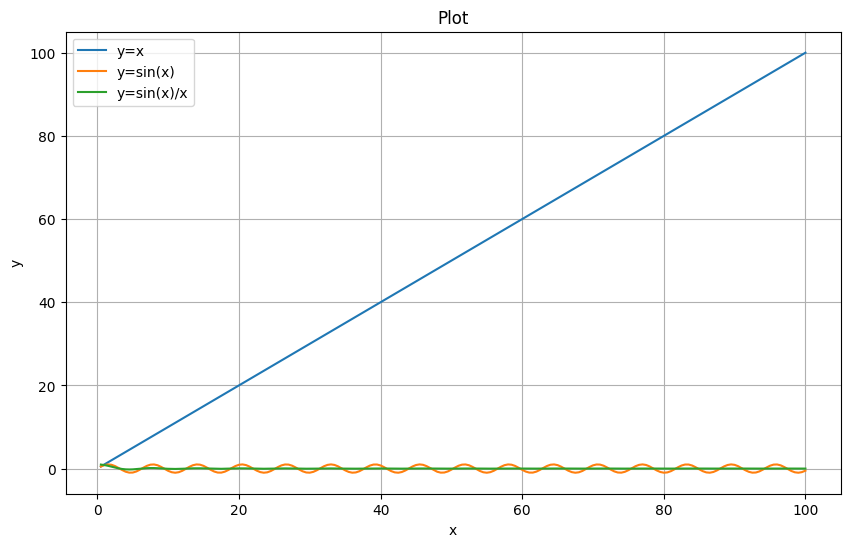

In [59]:
plt.figure(figsize=(10, 6))

plt.plot(x_values,y_x,label='y=x')
plt.plot(x_values,y_x4,label='y=sin(x)')
plt.plot(x_values,y_x5,label='y=sin(x)/x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.legend()

plt.grid(True)
plt.show()


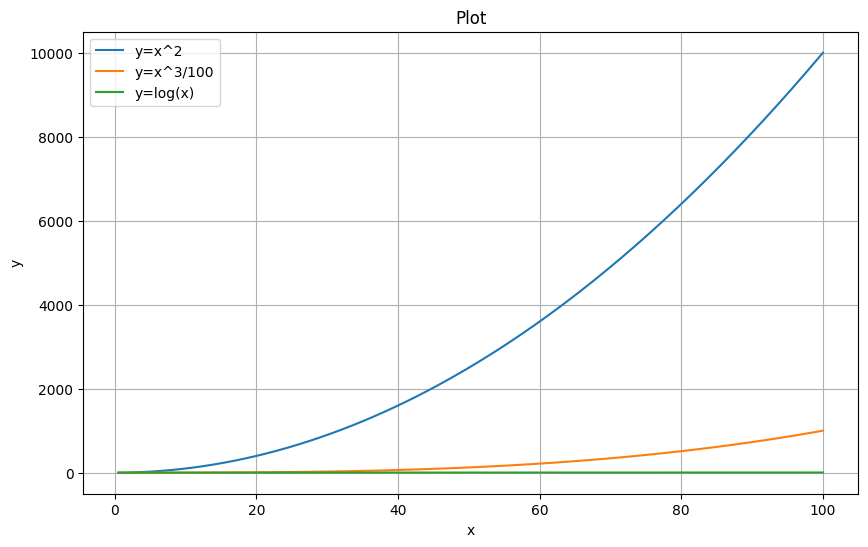

In [60]:
plt.figure(figsize=(10, 6))

plt.plot(x_values,y_x2,label='y=x^2')
plt.plot(x_values,y_x3,label='y=x^3/100')
plt.plot(x_values,y_x6,label='y=log(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.legend()

plt.grid(True)
plt.show()


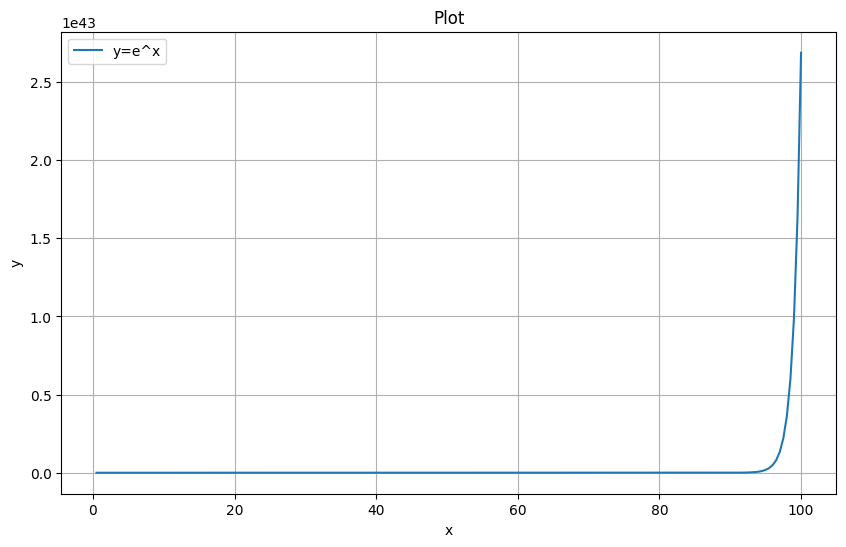

In [61]:
plt.figure(figsize=(10, 6))

plt.plot(x_values,y_x7,label='y=e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.legend()

plt.grid(True)
plt.show()


Q.10

In [30]:
np.random.seed(42)
mat = np.random.uniform(1,2,size=(20,5))

df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

print(df)

high_sd_col = df.std().idxmax()
print('highest standard deviatioin:' , high_sd_col)

low_mean_row = df.mean(axis=1).idxmin()
print('lowest mean row:',low_mean_row)

           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1.887213  1.

Q.11

In [35]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print(df)

LT8_cnt = (df['g'] == 'LT8').sum()
print('LT8_cnt: ', LT8_cnt)

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print('standard deviation lt8: ', std_lt8)
print('standard deviation gt8: ', std_gt8)


           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.074551  1.98

Q.12

In [79]:
x = np.random.randint(20,size=(4,4))
y = np.random.randint(20,size=4)
print(x.shape)
print(y.shape)

print((x+y).shape) 

(4, 4)
(4,)
(4, 4)


Q.13

In [67]:
def min_idx(arr):
    min_index = 0;
    for i in range(len(arr)):
        if arr[i] < arr[min_index] :
            min_index = i
    
    return min_index

arr = np.array([4,-2,3,1,5])
print(np.argmin(arr))
print(min_idx(arr))


1
1
